# Linear Regression Lecture: Predicting Student Marks

In this notebook, we'll explore the **Student_Marks.csv** dataset to understand how student study habits may relate to performance.

**Goals:**
- Perform exploratory data analysis (EDA)
- Apply simple linear regression
- Explain the math behind the model
- Visualize predictions and evaluate performance

## **Step 1: Load and Inspect the Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv("Student_Marks.csv")
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


## **Step 2: Data Overview & EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [ ]:
df.isnull().sum()

,0
number_courses,0
time_study,0
Marks,0


## **Step 3: Visualizations**

Let's explore the distribution of the variables and the relationship between study hours and student marks.

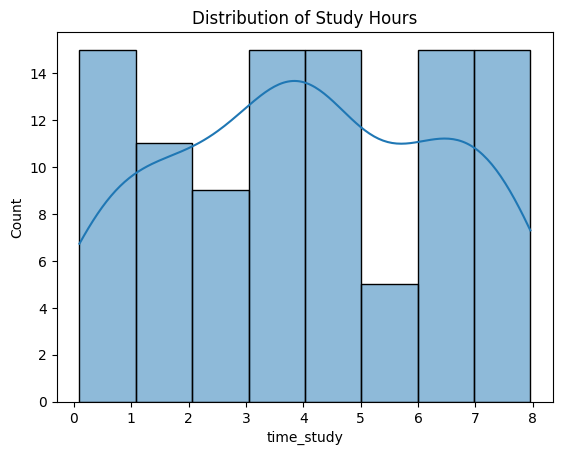

In [ ]:
sns.histplot(df['time_study'], kde=True)
plt.title('Distribution of Study Hours')
plt.show()

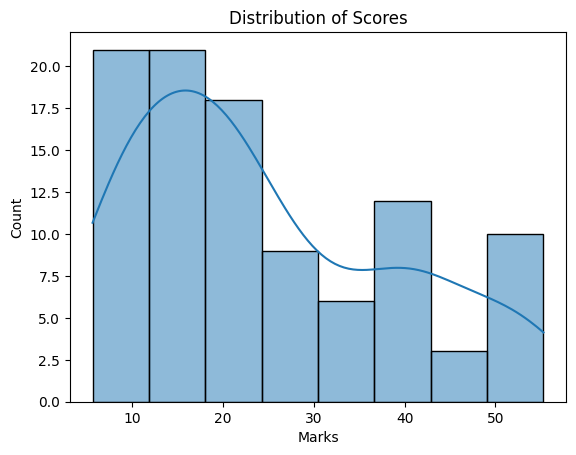

In [ ]:
sns.histplot(df['Marks'], kde=True)
plt.title('Distribution of Scores')
plt.show()

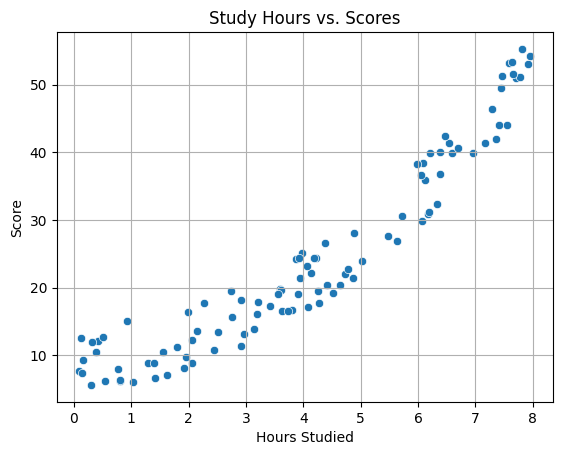

In [ ]:
sns.scatterplot(x='time_study', y='Marks', data=df)
plt.title('Study Hours vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.grid(True)
plt.show()

### Observations
1. The `Hours` and `Scores` variables are both **positively skewed**, but generally follow a reasonable distribution.
2. The scatterplot shows a clear **positive linear relationship** between hours studied and scores.
3. No missing values — the dataset is clean and ready for modeling.

### **Linear Regression Equation**

The linear model is:

`ŷ = b₀ + b₁x`

Where:
- `ŷ`: predicted score  
- `x`: number of hours studied  
- `b₁`: **slope** — change in score per additional hour studied  
- `b₀`: **intercept** — predicted score when `x = 0`

---

### Cost Function (Mean Squared Error)

To measure how well the line fits, we use **Mean Squared Error (MSE)**:

`MSE = (1/n) ∑ (yᵢ − ŷᵢ)²`

Where:
- `yᵢ`: actual score  
- `ŷᵢ`: predicted score  
- `n`: number of data points

**Goal:** Find the values of `b₀` and `b₁` that minimize the MSE — the average squared difference between predictions and actual values.

## **Step 5: Fit a Linear Regression Model**

In [ ]:
X = df[['time_study']]
y = df['Marks']

model = LinearRegression()
model.fit(X, y)

print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"Slope (b1): {model.coef_[0]:.2f}")

Intercept (b0): 1.22
Slope (b1): 5.69


This code prints the two key parameters from a simple linear regression model:

---

**`model.intercept_`**  
- This is **b₀**, the **intercept** of the regression line.
- It represents the predicted value of **y** (score) when **x = 0** (hours studied = 0).
- In other words: what the model predicts for someone who didn't study at all.

---

**`model.coef_[0]`**  
- This is **b₁**, the **slope** or **coefficient** of the input feature (`Hours`).
- It tells you how much the predicted score increases for **each additional hour studied**.
- `.coef_` returns a list/array — `[0]` grabs the coefficient for the first (and only) feature.

---

**`.2f`**  
- This is Python string formatting: it **rounds the number to 2 decimal places**.

---

### Example Output:

If the model prints:

```
Intercept (b0): 1.22
Slope (b1): 5.69
```

Then the model equation is:

**Model Equation:**  
`ŷ = 1.22 + 5.69 × x`

And your interpretation is:
- A student who studies **0 hours** is predicted to score **1.22**.
- For every **1 hour increase**, their score increases by about **5.69 points**.

## **Step 6: Make Predictions and Evaluate Model**

In [ ]:
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 22.79
R-squared: 0.89


### Understanding R-squared (R²)

**R²**, or the **coefficient of determination**, measures how well the linear regression model explains the variation in the target variable.
### Formula:

R² = 1 − (SS_res / SS_tot)

Where:
- **SS_res**: Residual sum of squares — squared error between actual and predicted values
- **SS_tot**: Total sum of squares — total variation of actual values from their mean

---

### Interpretation:

- **R² = 1.0** → Perfect prediction (100% of variance explained)
- **R² = 0.0** → Model explains none of the variance
- **R² < 0.0** → Model is worse than predicting the average every time

---

### Example:

If your model returns:

```
R-squared: 0.89
```

That means **89% of the variation** in the target variable (like test scores) is explained by your model’s input (like study hours).

---

### When is R² Useful?

- Use it to **quantify how much of the variance** in the output your model captures
- Best for **regression** problems
- Don’t use it for classification problems or non-linear models without caution

---

### Things to Think About:

- A high R² doesn’t always mean a good model (e.g. it might be overfitting)
- A low R² could still be useful in noisy real-world data (like economics or medicine)

## **Step 7: Visualize the Fitted Line**

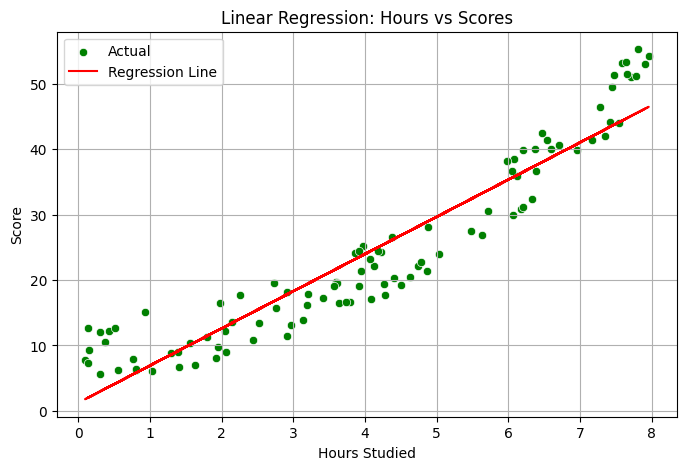

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='time_study', y='Marks', data=df, label='Actual', color='green')
plt.plot(df['time_study'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

## **Step 8: Interpretation**

- **Slope:** On average, every additional hour studied increases the score by the slope value.
- **Intercept:** The expected score for someone who studied 0 hours (may or may not be meaningful).
- **R² (R-squared):** Proportion of variance in `Scores` explained by `Hours`. Closer to 1 means better fit.


# **Discussion Questions:**
1. Is this model appropriate for making predictions beyond the observed data?
2. What assumptions are we making when using linear regression here?
3. What could go wrong if this were applied to a different student population?